# Import Libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Data processing

In [205]:
path_data = 'datasets/us_stock/us_stock_dataset.csv'

df = pd.read_csv(path_data, parse_dates=['Date'],).drop("Unnamed: 0", axis=1)
df.dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,21-12-2023,2.572,84550.0,73.89,251980.0,3.9175,70080.0,"43,865.90",48960,970.3,...,"5,41,000",7700,491.61,2750000,153.84,35950000,354.09,15220000,"2,041.80",540.0
1,20-12-2023,2.447,125260.0,74.22,273360.0,3.9060,66320.0,"43,662.80",70190,974,...,"5,43,740",8150,489.27,4520000,152.12,50000000,349.28,15990000,"2,038.10",260.0
2,19-12-2023,2.492,170440.0,73.44,25690.0,3.8980,84950.0,"42,259.30",55290,965.8,...,"5,54,650",7500,495.02,3840000,153.79,42890000,350.36,17660000,"2,042.60",470.0
3,18-12-2023,2.503,154300.0,72.47,73940.0,3.8520,54990.0,"42,659.70",61580,954.3,...,"5,51,182",10460,486.12,6410000,154.07,62510000,344.62,18360000,"2,030.90",250.0
4,15-12-2023,2.491,189240.0,71.43,95510.0,3.8905,73670.0,"41,929.00",45280,952.6,...,"5,44,478",8430,472.06,7840000,149.97,110090000,334.92,31780000,"2,026.00",630.0


In [206]:
df.shape

(609, 38)

In [207]:
# Converts date column to pandas datetime
df['Date'] = df['Date'].str.replace('/', '-')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.set_index('Date').to_period('D')

In [208]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)

In [209]:
temp = pd.DataFrame()
for col in df.columns:
  if 'Price' in col:
    temp[col] = df[col]

df = temp
df.head()

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
2023-12-21,2.572,73.89,3.9175,43865.9,970.3,2239.62,4746.75,16757.41,194.68,254.50,373.54,24.585,140.42,489.90,541000.0,491.61,153.84,354.09,2041.8
2023-12-20,2.447,74.22,3.9060,43662.8,974.0,2202.19,4701.19,16554.16,194.83,247.14,370.62,24.631,138.34,481.11,543740.0,489.27,152.12,349.28,2038.1
2023-12-19,2.492,73.44,3.8980,42259.3,965.8,2177.44,4768.37,16811.86,196.94,257.22,373.26,24.321,136.65,496.04,554650.0,495.02,153.79,350.36,2042.6
2023-12-18,2.503,72.47,3.8520,42659.7,954.3,2218.80,4740.56,16729.80,195.89,252.08,372.65,24.107,135.80,500.77,551182.0,486.12,154.07,344.62,2030.9
2023-12-15,2.491,71.43,3.8905,41929.0,952.6,2220.41,4719.19,16623.45,197.57,253.50,370.73,24.154,132.60,488.90,544478.0,472.06,149.97,334.92,2026.0


# Graphs

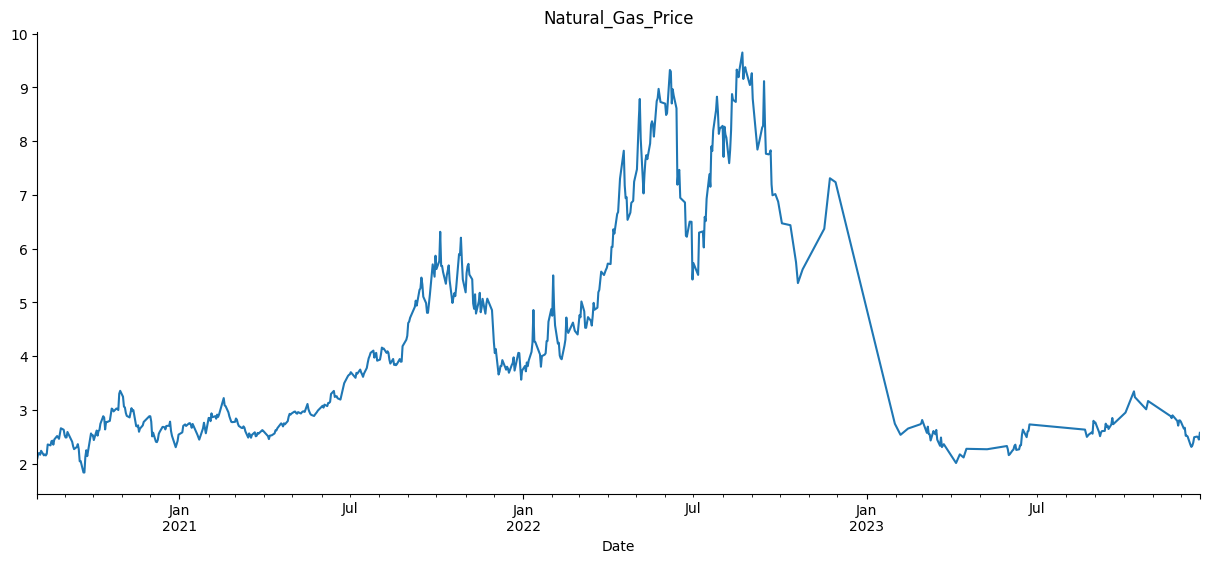

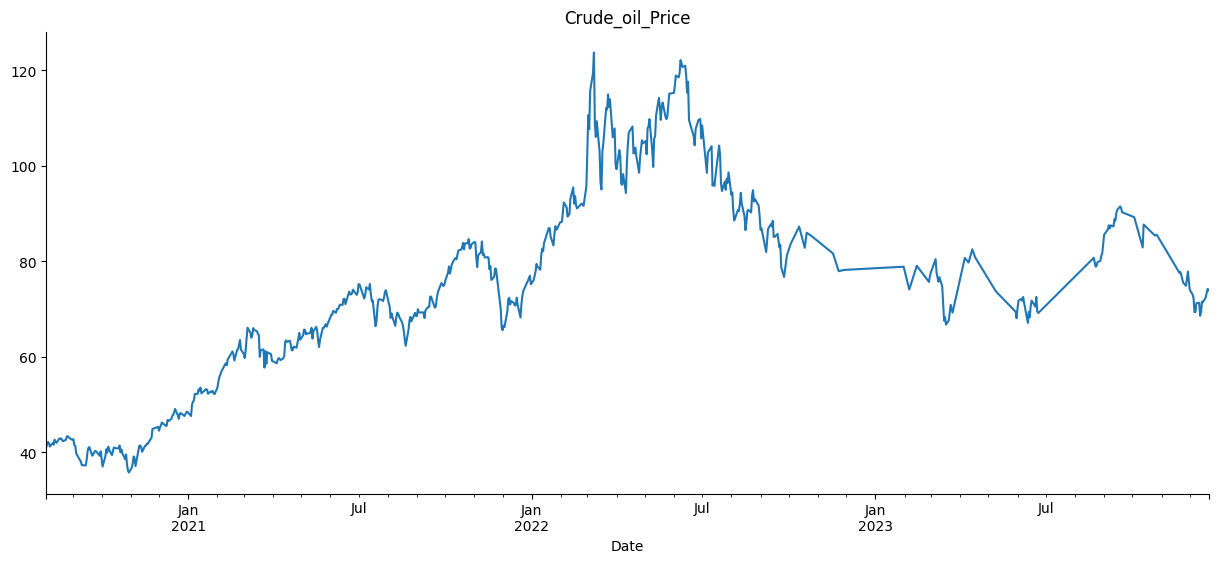

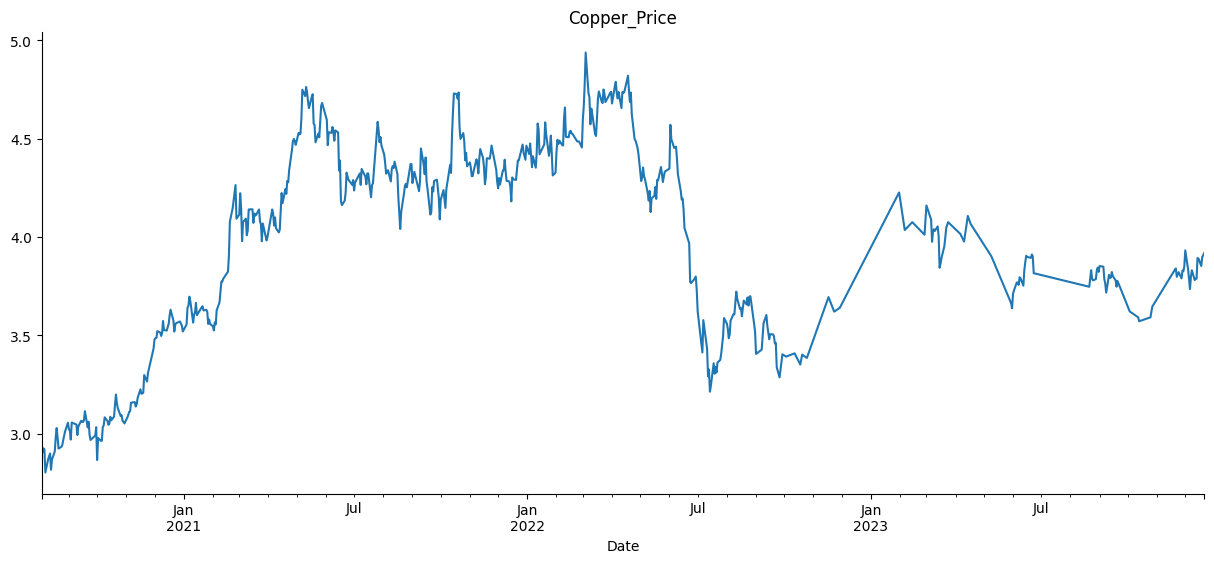

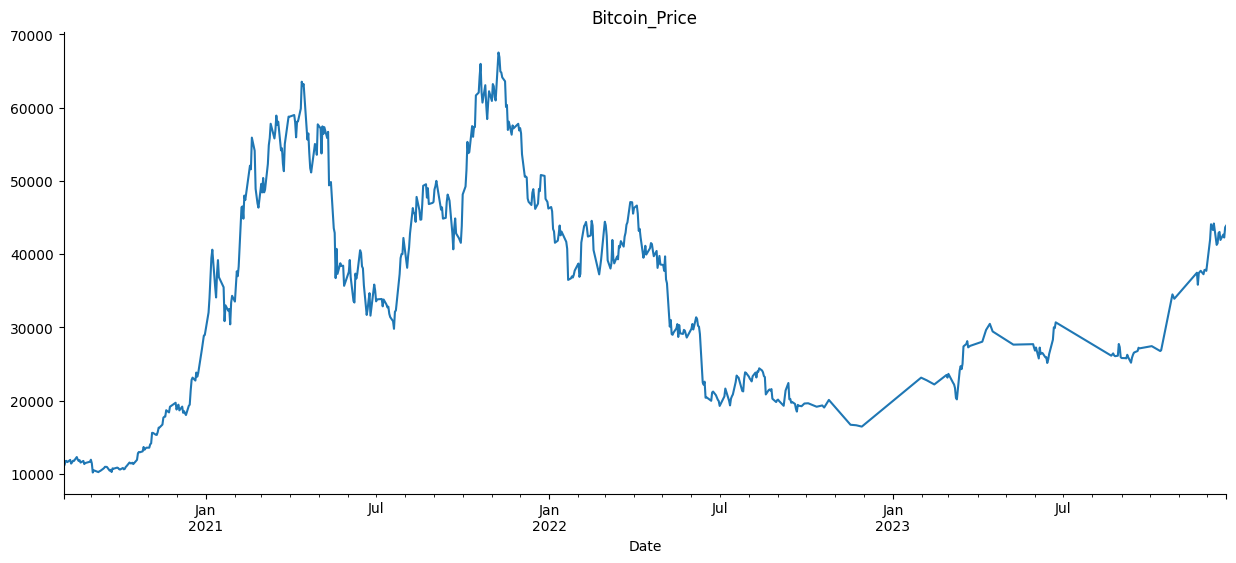

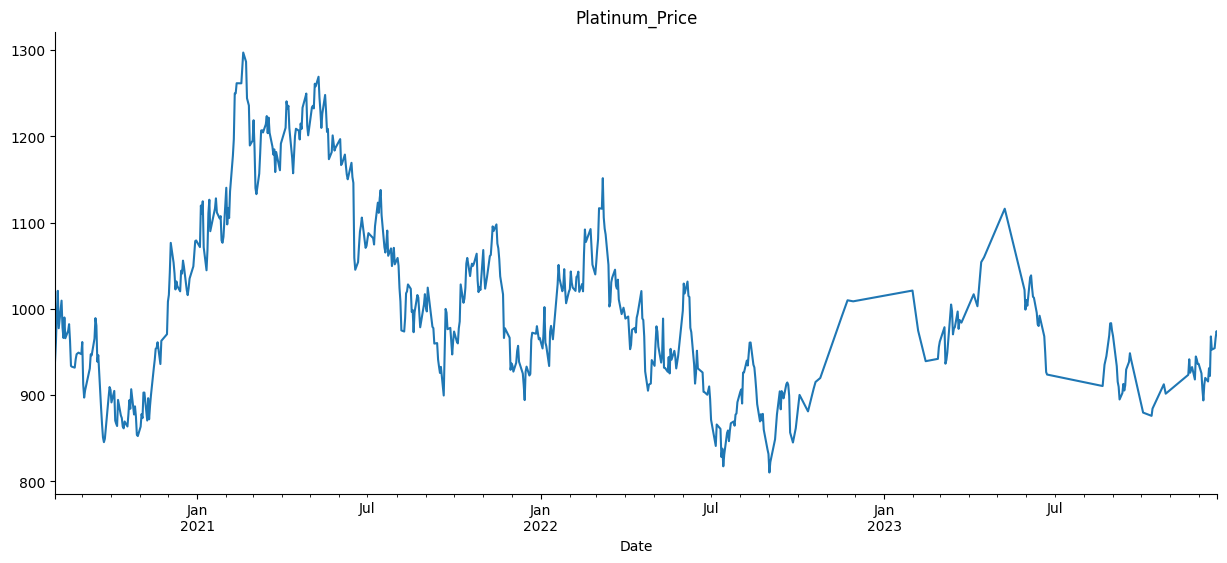

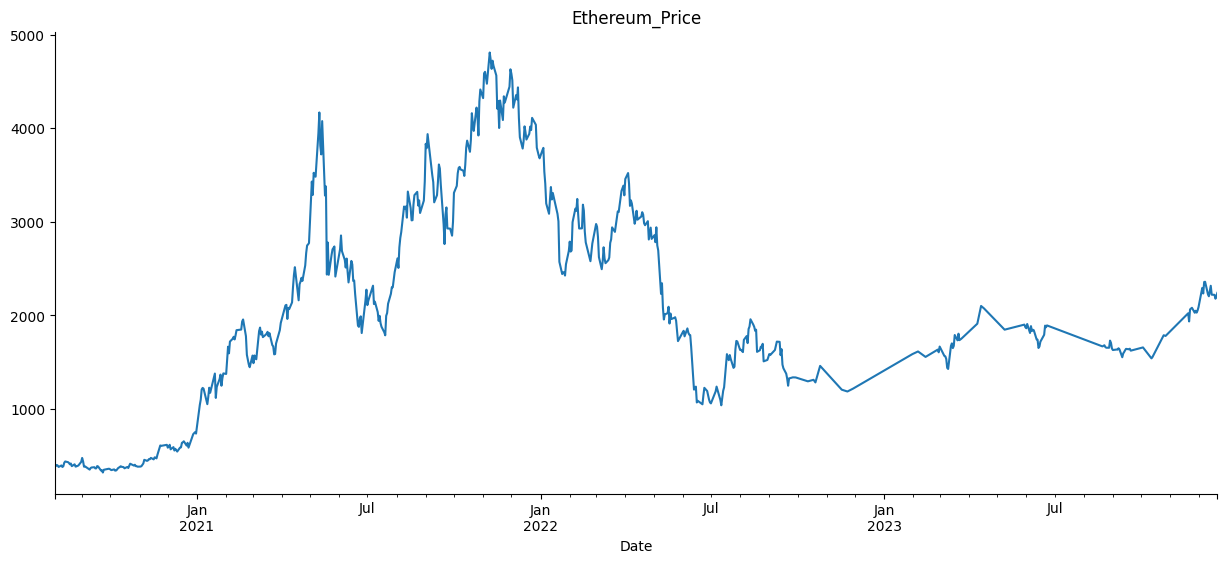

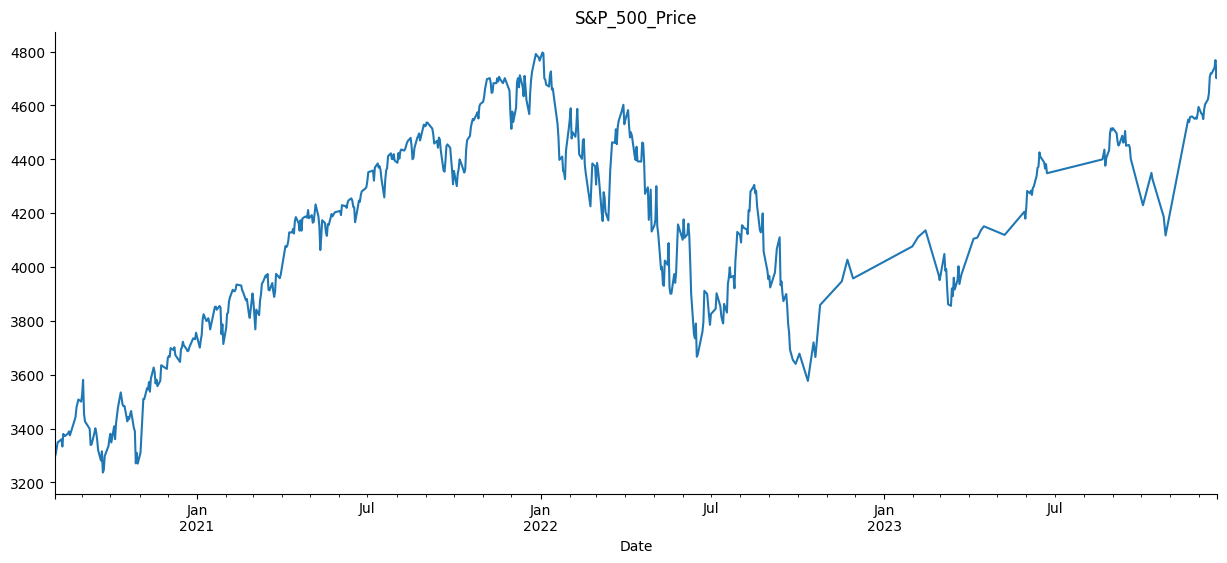

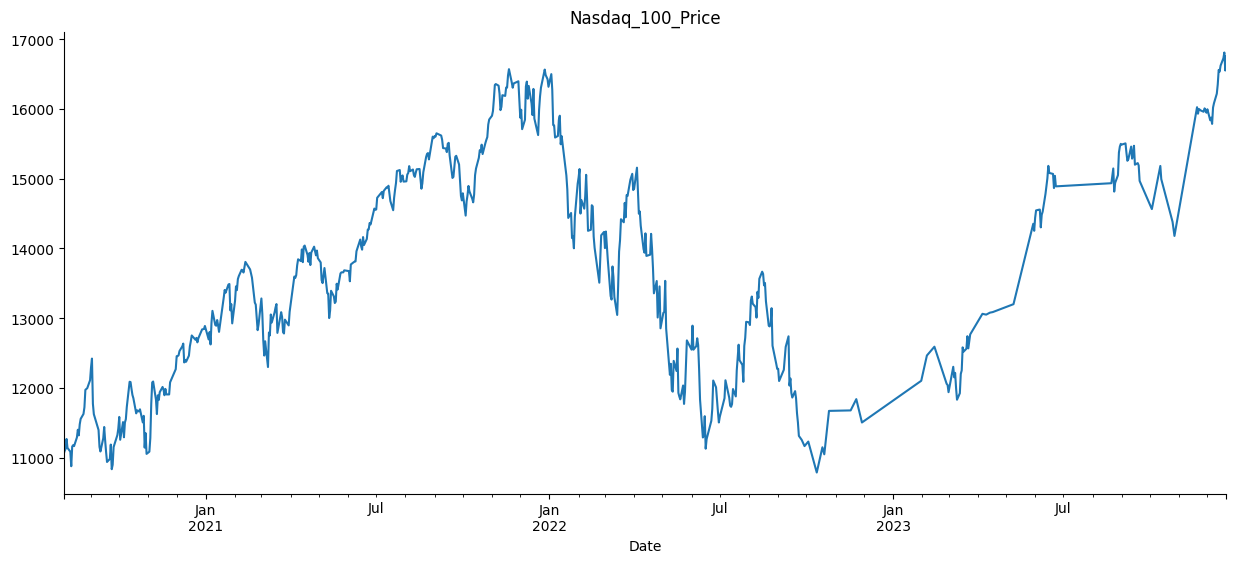

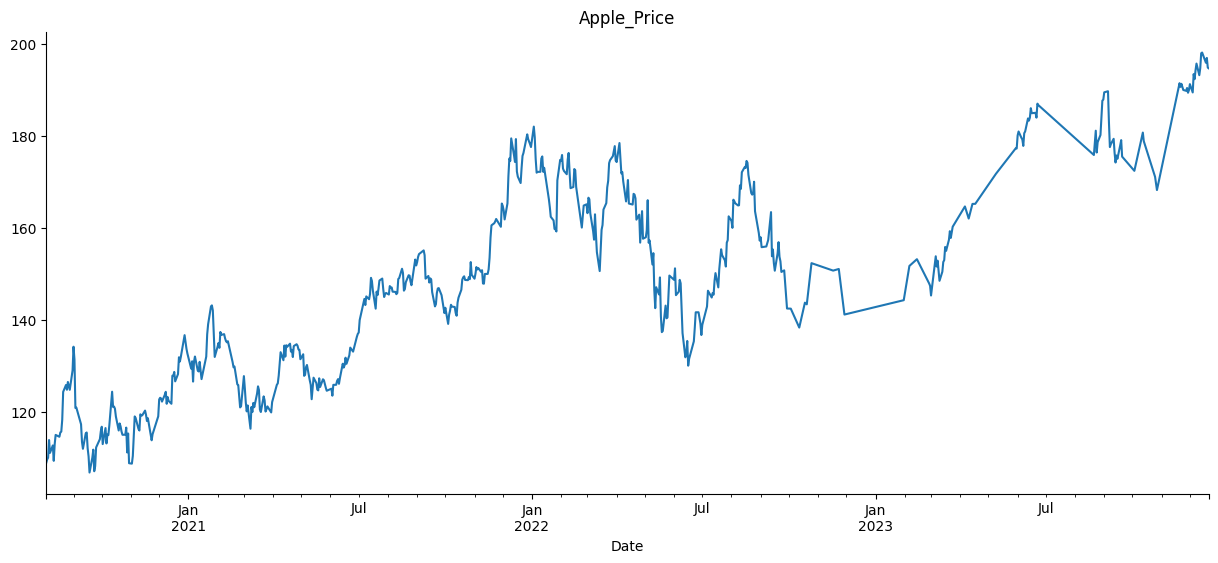

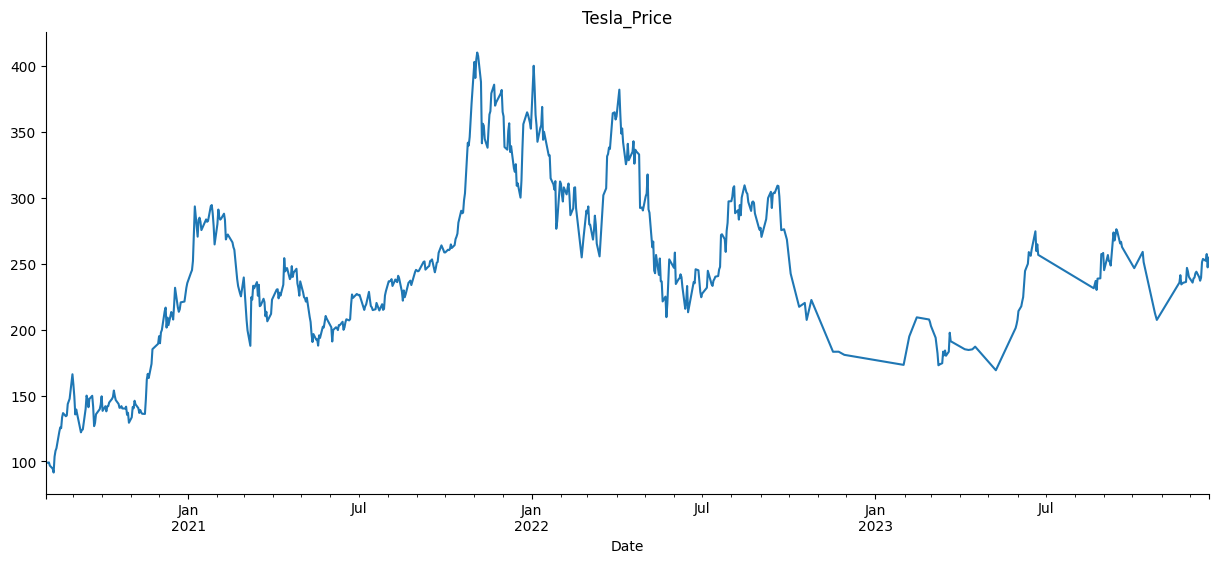

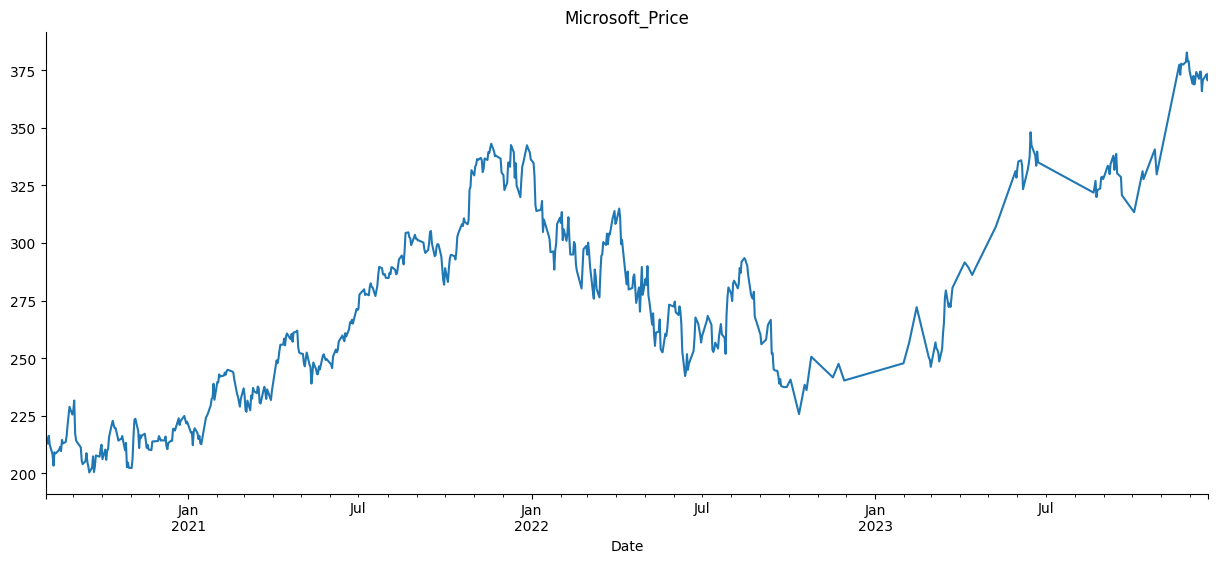

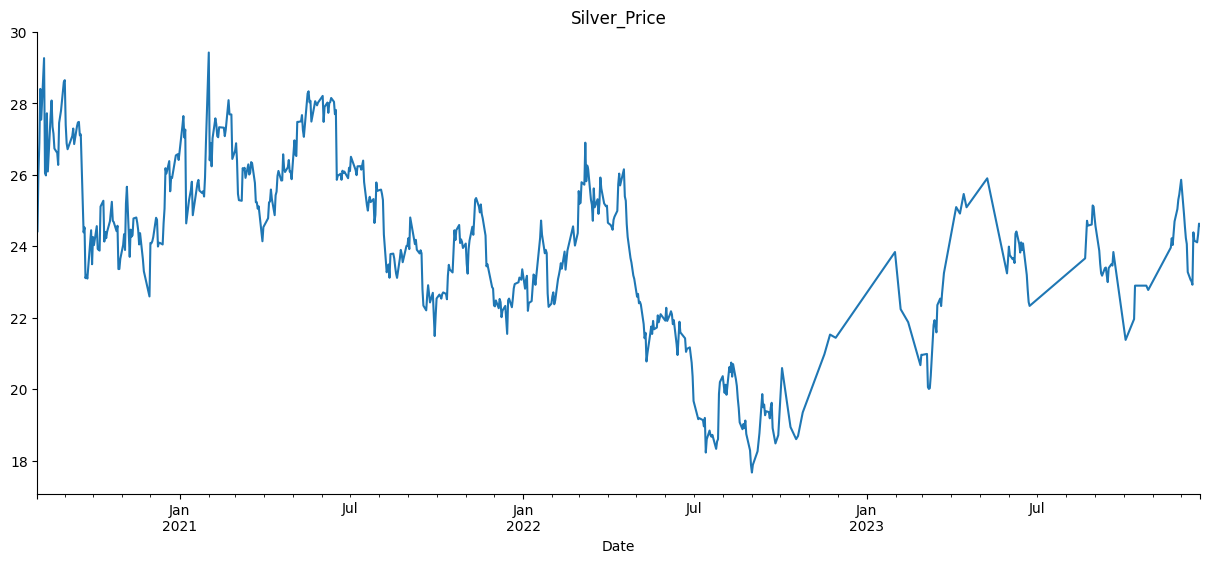

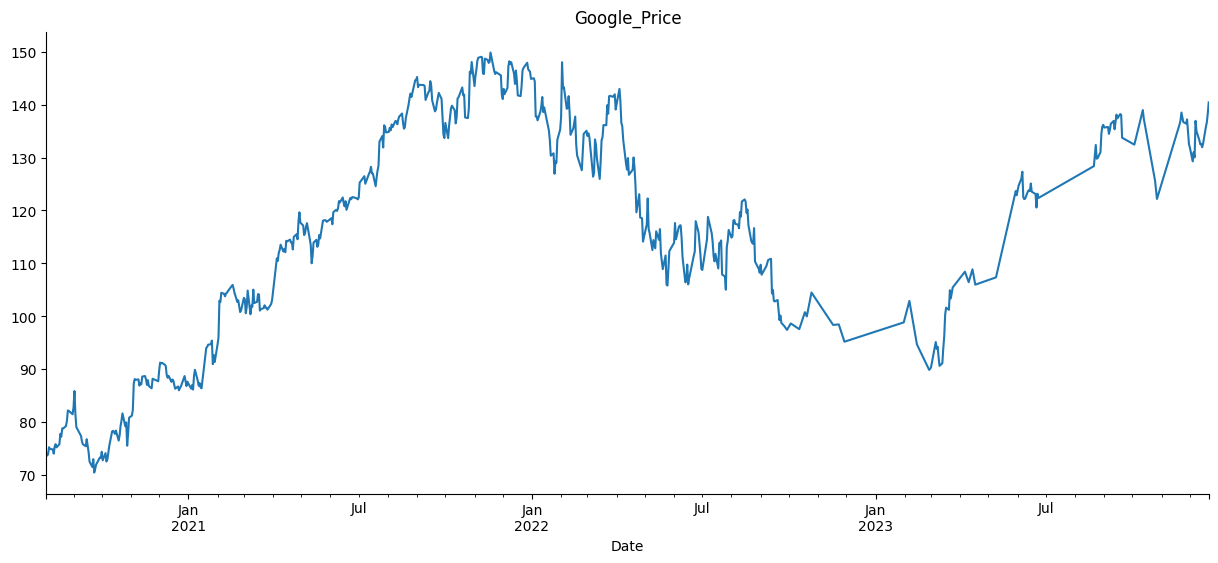

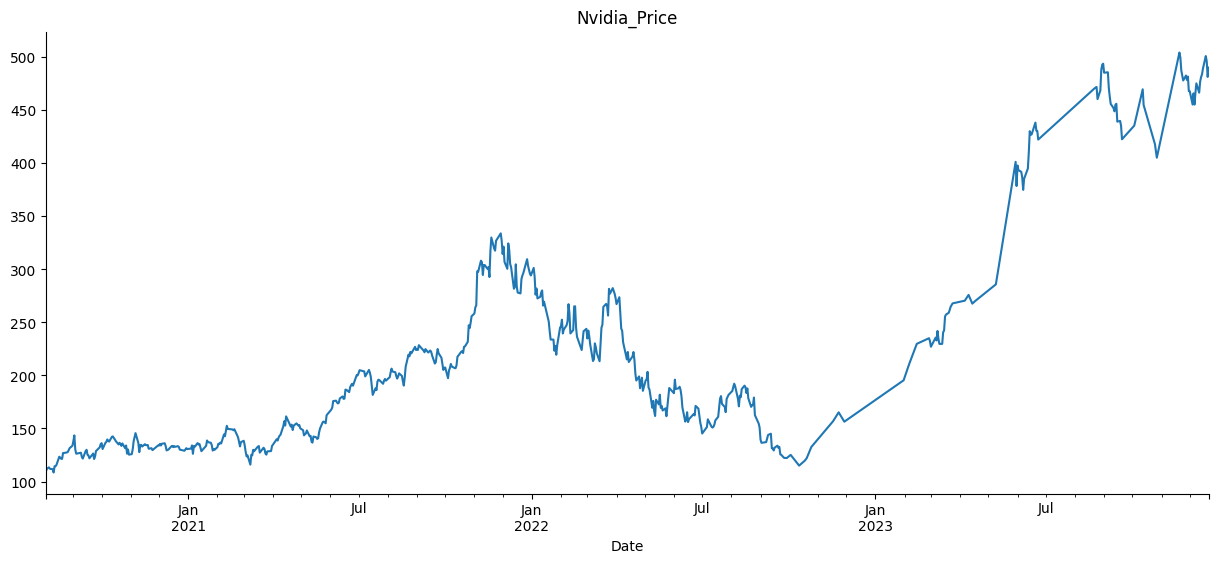

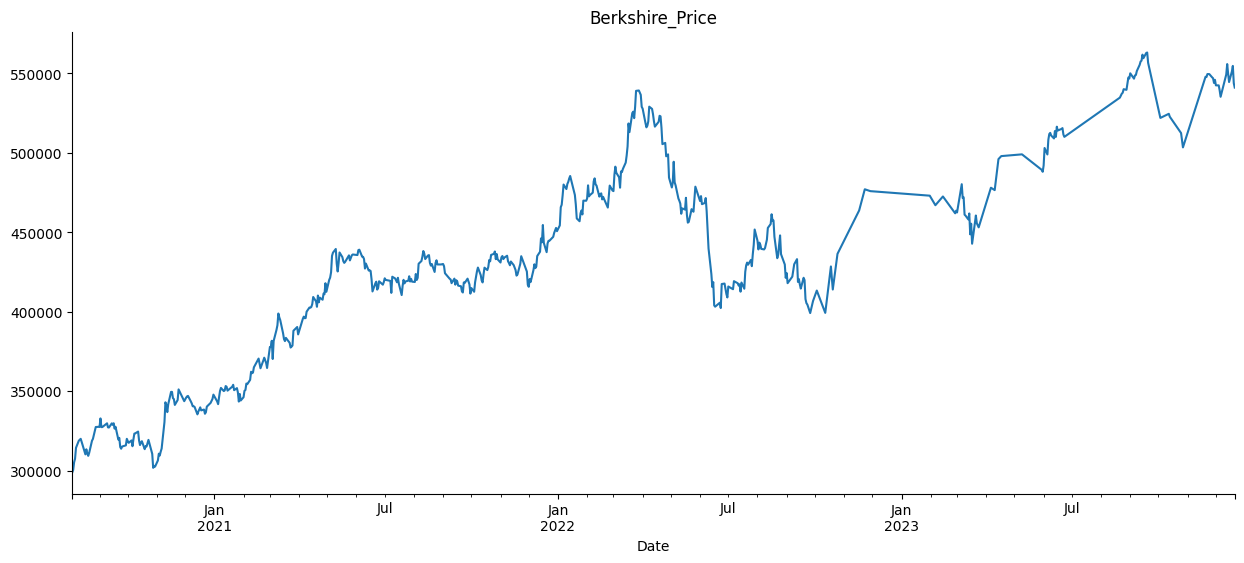

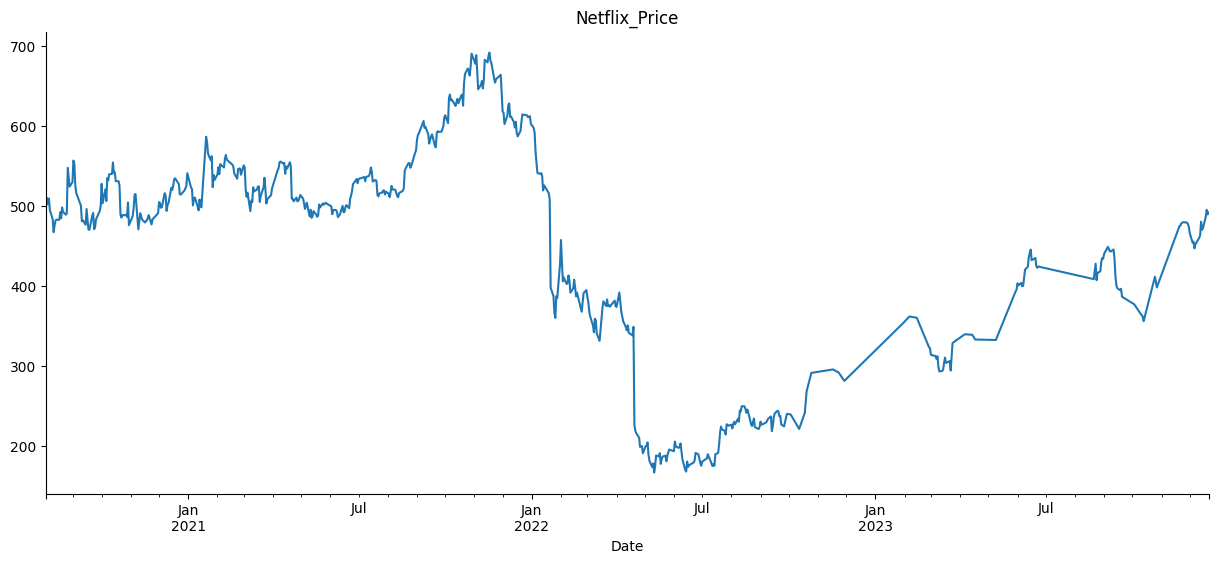

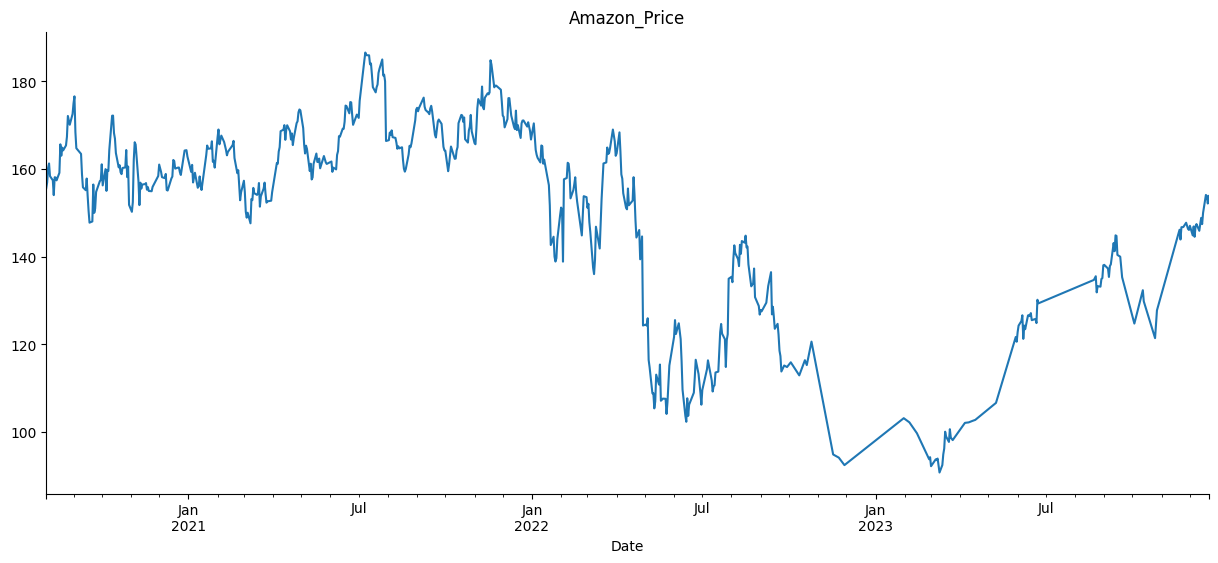

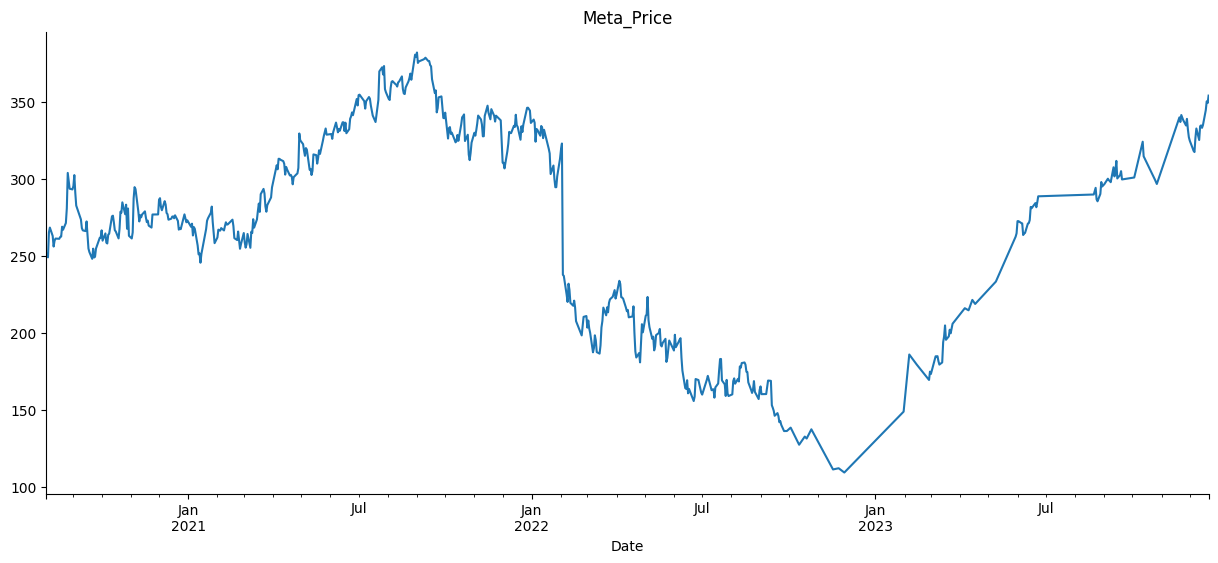

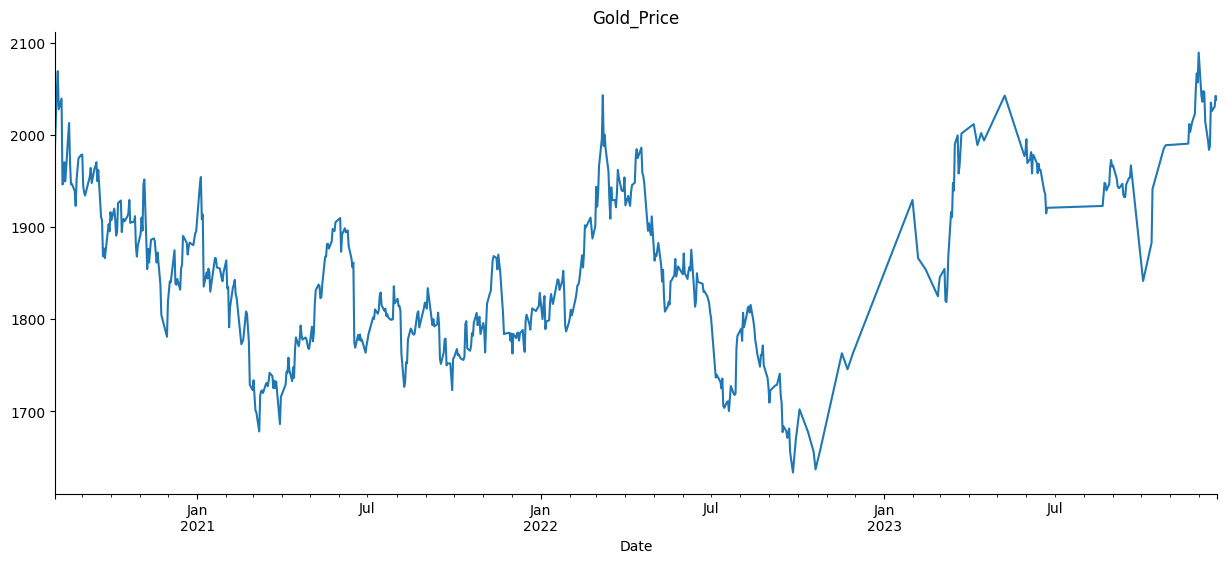

In [210]:
for col in df.columns:
  df[col].plot(kind='line', figsize=(15, 6), title=col)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.show()

In [211]:
for col in df.columns:
  peak_price = df[col].idxmax()
  print(f"{col} was at its peak on {peak_price}")

Natural_Gas_Price was at its peak on 2022-08-22
Crude_oil_Price was at its peak on 2022-03-08
Copper_Price was at its peak on 2022-03-04
Bitcoin_Price was at its peak on 2021-11-08
Platinum_Price was at its peak on 2021-02-19
Ethereum_Price was at its peak on 2021-11-08
S&P_500_Price was at its peak on 2022-01-03
Nasdaq_100_Price was at its peak on 2023-12-19
Apple_Price was at its peak on 2023-12-14
Tesla_Price was at its peak on 2021-11-04
Microsoft_Price was at its peak on 2023-11-28
Silver_Price was at its peak on 2021-02-01
Google_Price was at its peak on 2021-11-18
Nvidia_Price was at its peak on 2023-11-20
Berkshire_Price was at its peak on 2023-09-19
Netflix_Price was at its peak on 2021-11-17
Amazon_Price was at its peak on 2021-07-08
Meta_Price was at its peak on 2021-09-01
Gold_Price was at its peak on 2023-12-01


In [212]:
for col in df.columns:
  trough_price = df[col].idxmin()
  print(f"{col} was at its trough on {trough_price}")

Natural_Gas_Price was at its trough on 2020-09-22
Crude_oil_Price was at its trough on 2020-10-30
Copper_Price was at its trough on 2020-08-07
Bitcoin_Price was at its trough on 2020-09-03
Platinum_Price was at its trough on 2022-09-01
Ethereum_Price was at its trough on 2020-09-23
S&P_500_Price was at its trough on 2020-09-23
Nasdaq_100_Price was at its trough on 2022-10-12
Apple_Price was at its trough on 2020-09-18
Tesla_Price was at its trough on 2020-08-11
Microsoft_Price was at its trough on 2020-09-18
Silver_Price was at its trough on 2022-09-01
Google_Price was at its trough on 2020-09-23
Nvidia_Price was at its trough on 2020-08-11
Berkshire_Price was at its trough on 2020-08-03
Netflix_Price was at its trough on 2022-05-11
Amazon_Price was at its trough on 2023-03-10
Meta_Price was at its trough on 2022-11-29
Gold_Price was at its trough on 2022-09-26


<699 * Days>


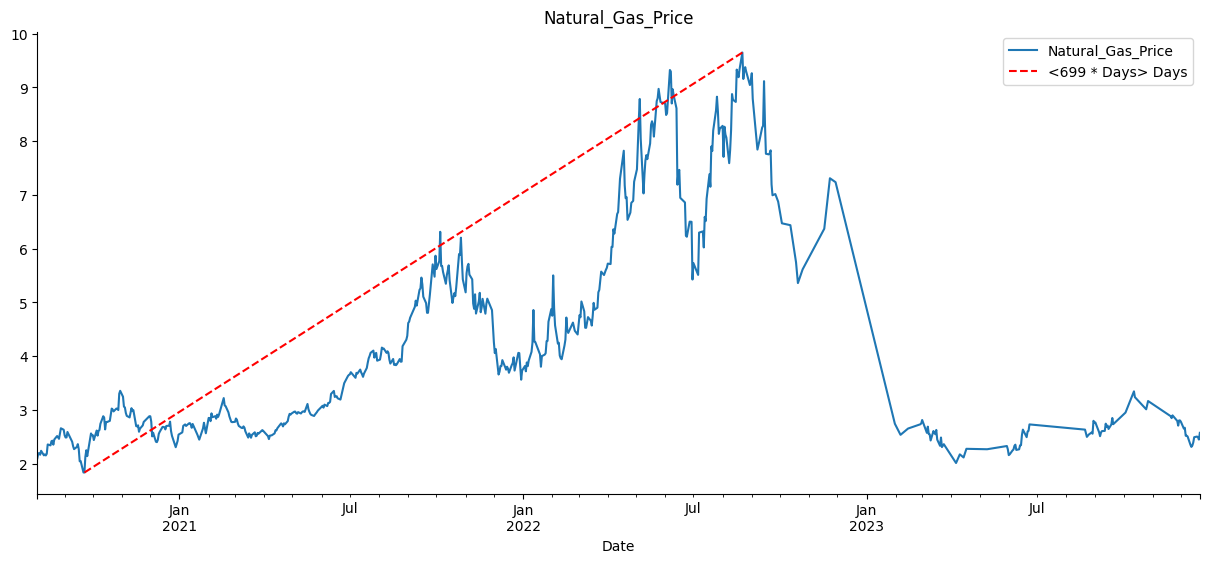

<494 * Days>


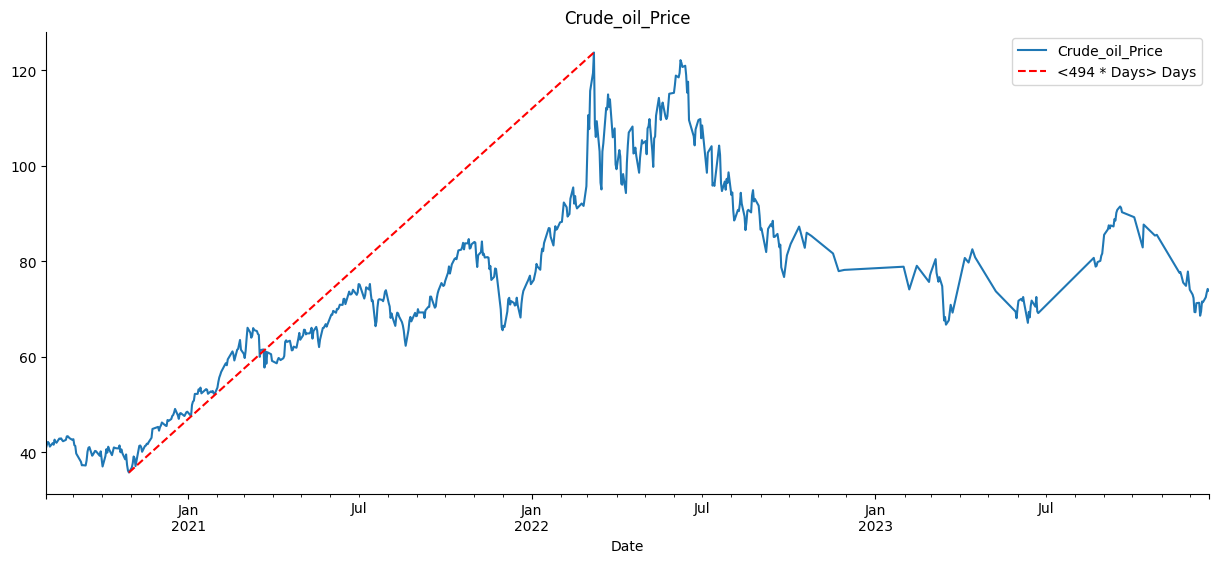

<574 * Days>


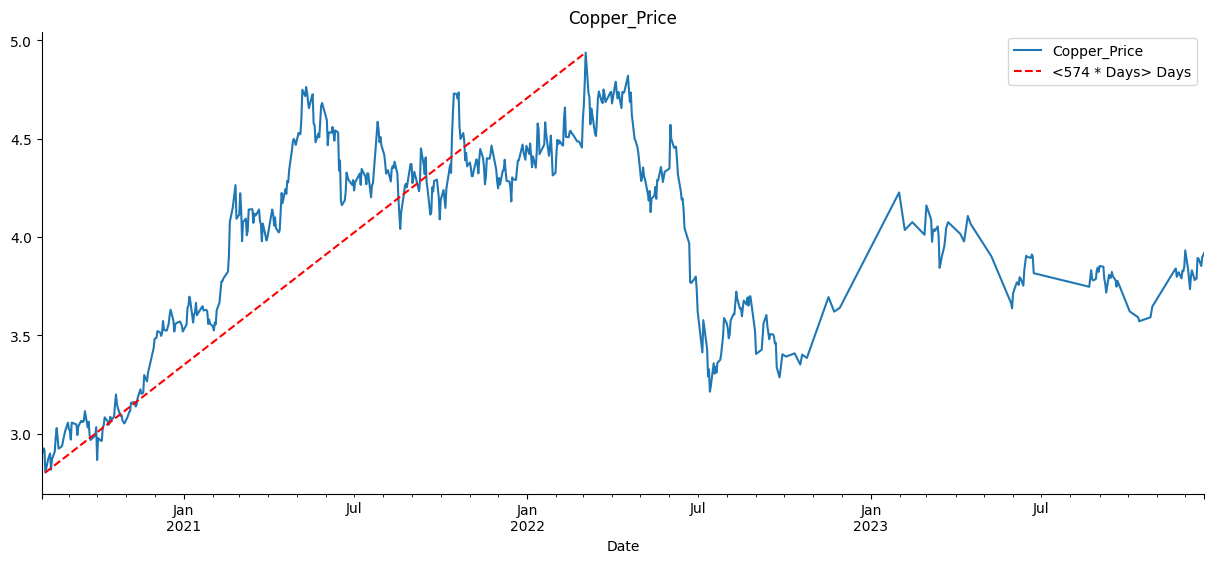

<431 * Days>


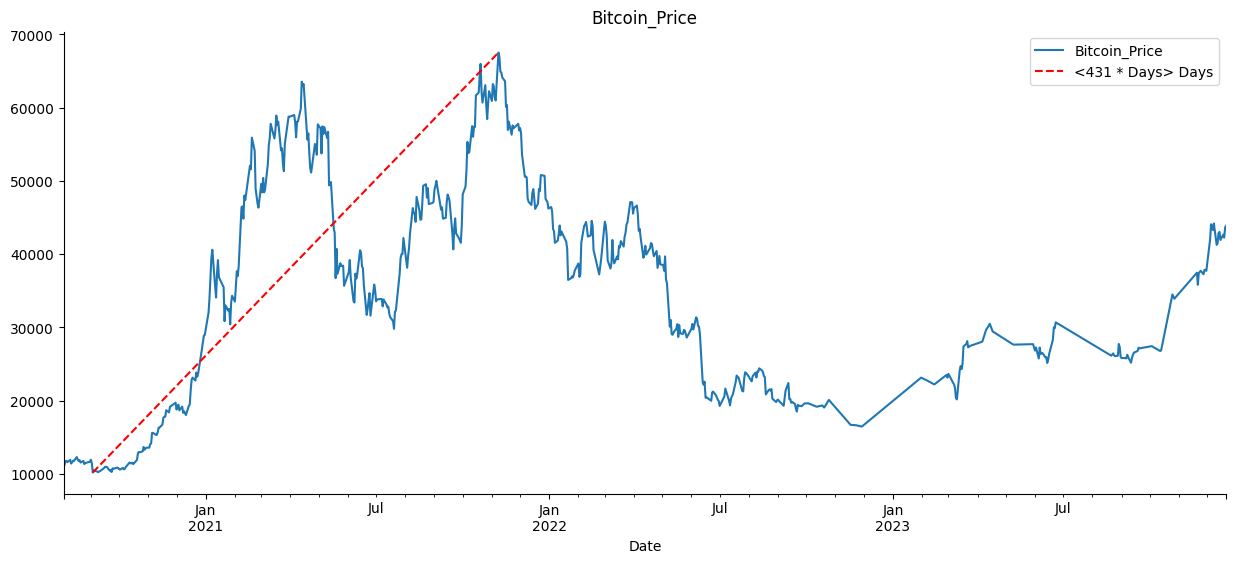

<-559 * Days>


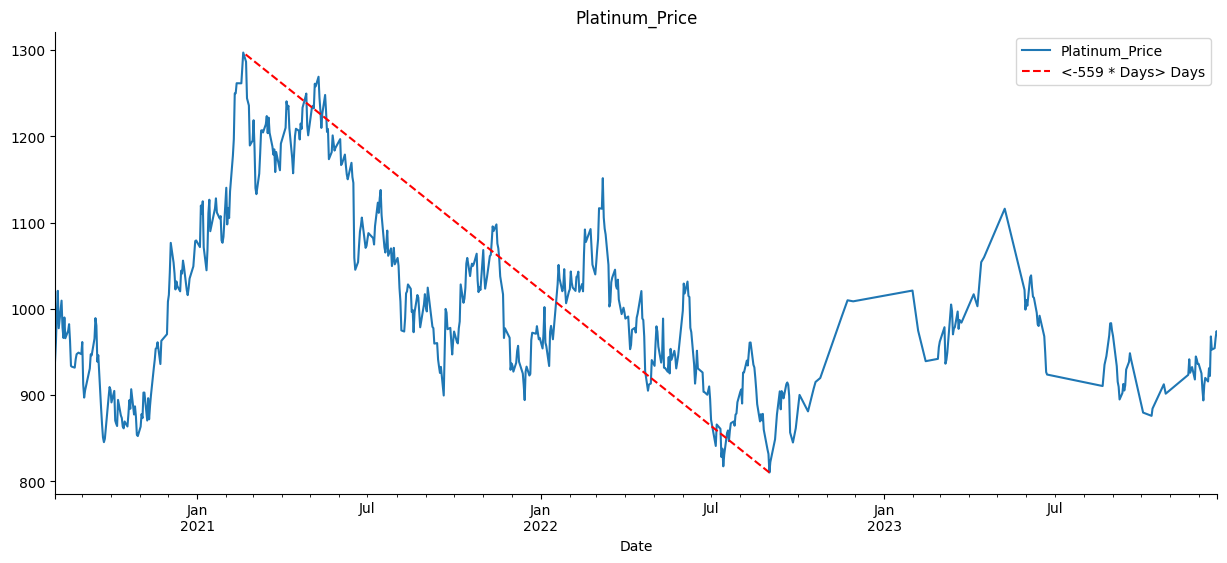

<411 * Days>


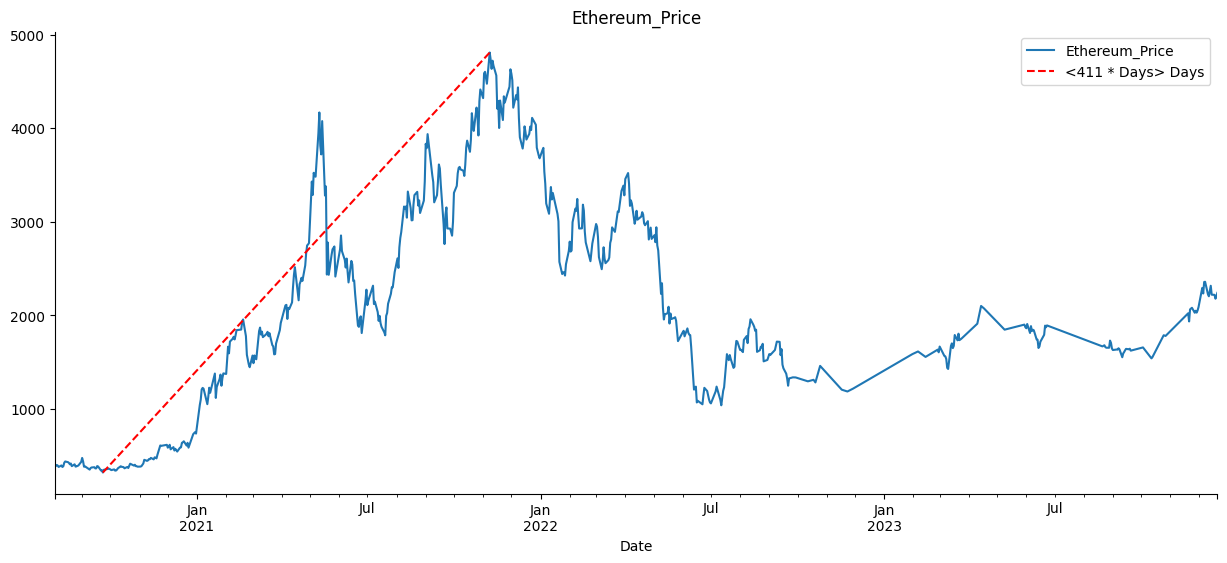

<467 * Days>


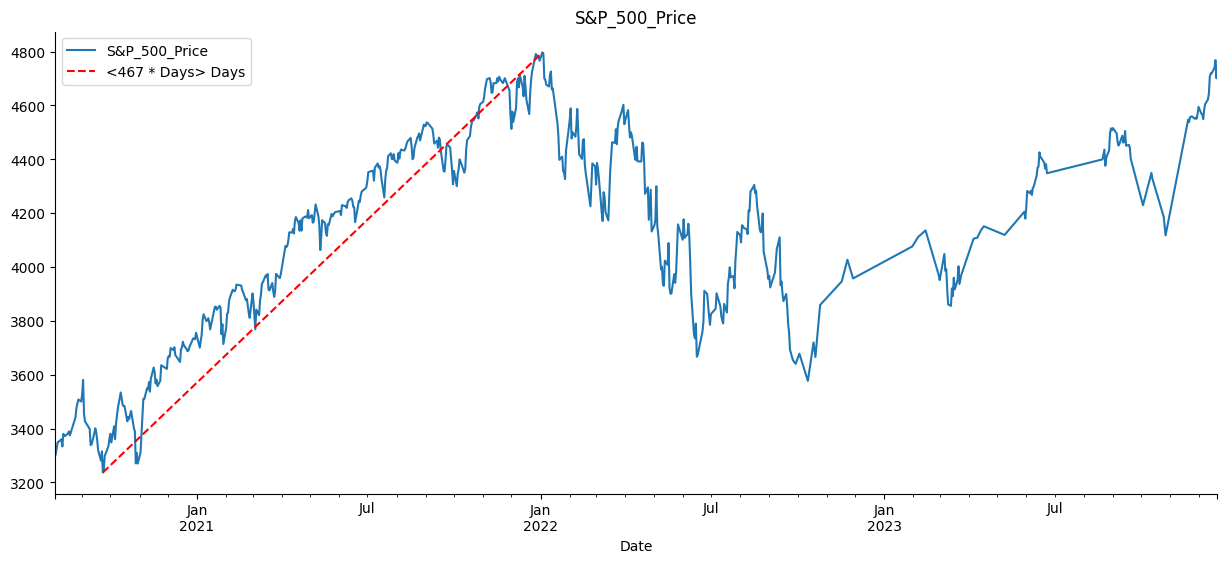

<433 * Days>


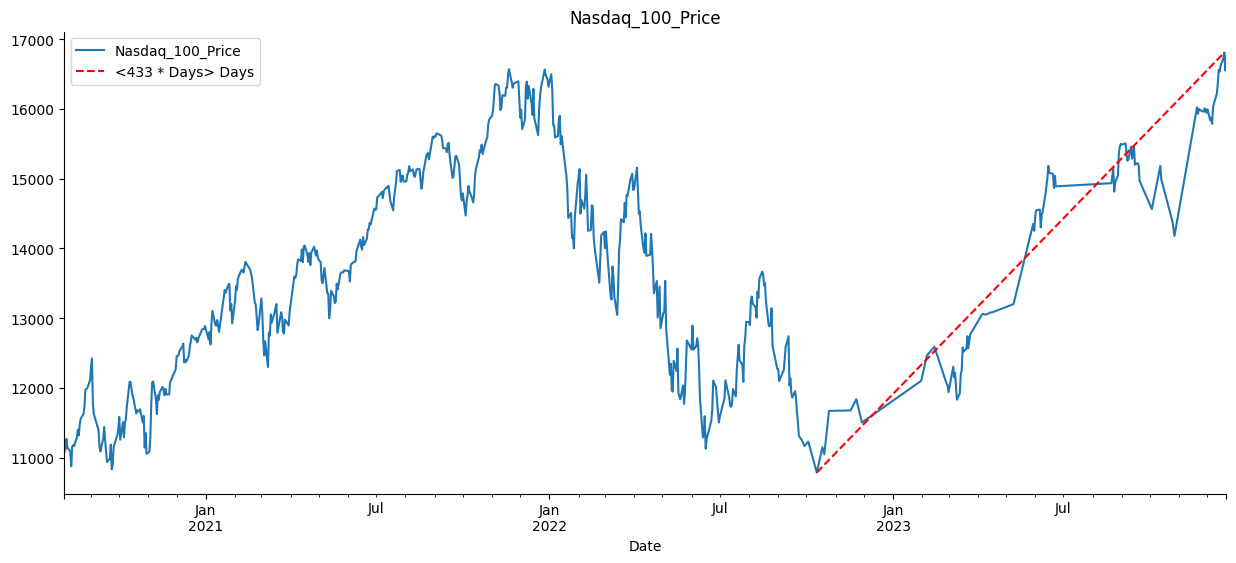

<1182 * Days>


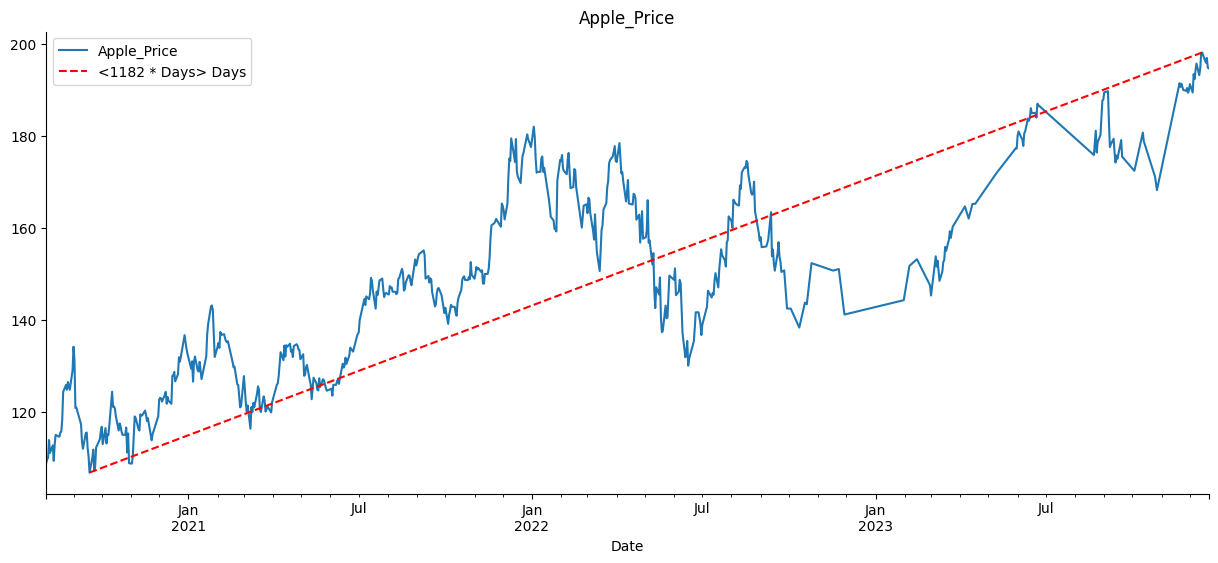

<450 * Days>


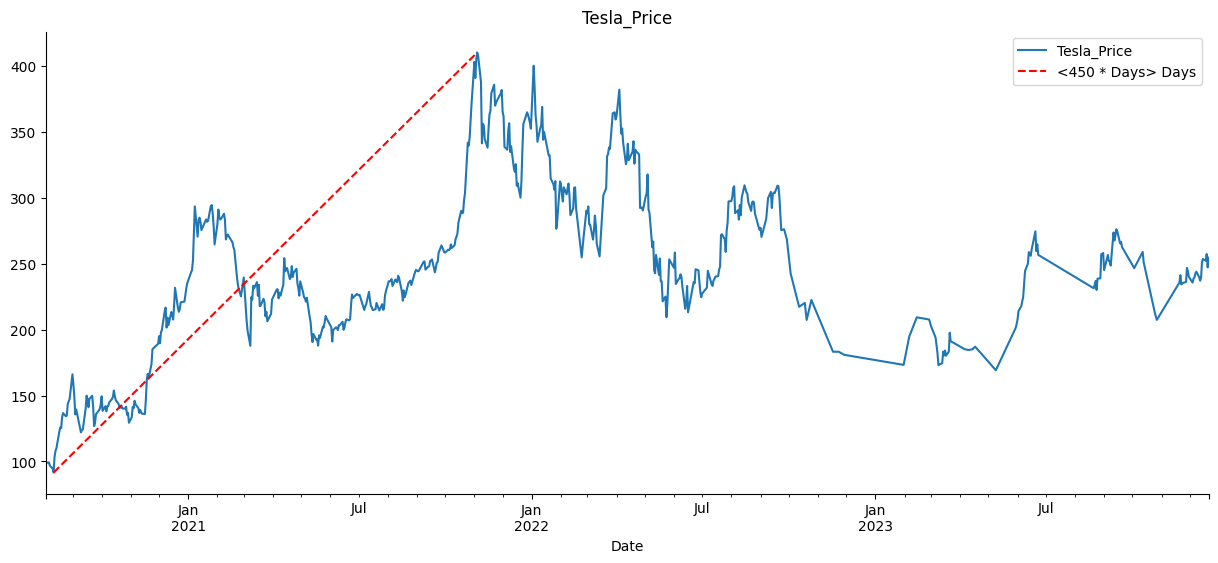

<1166 * Days>


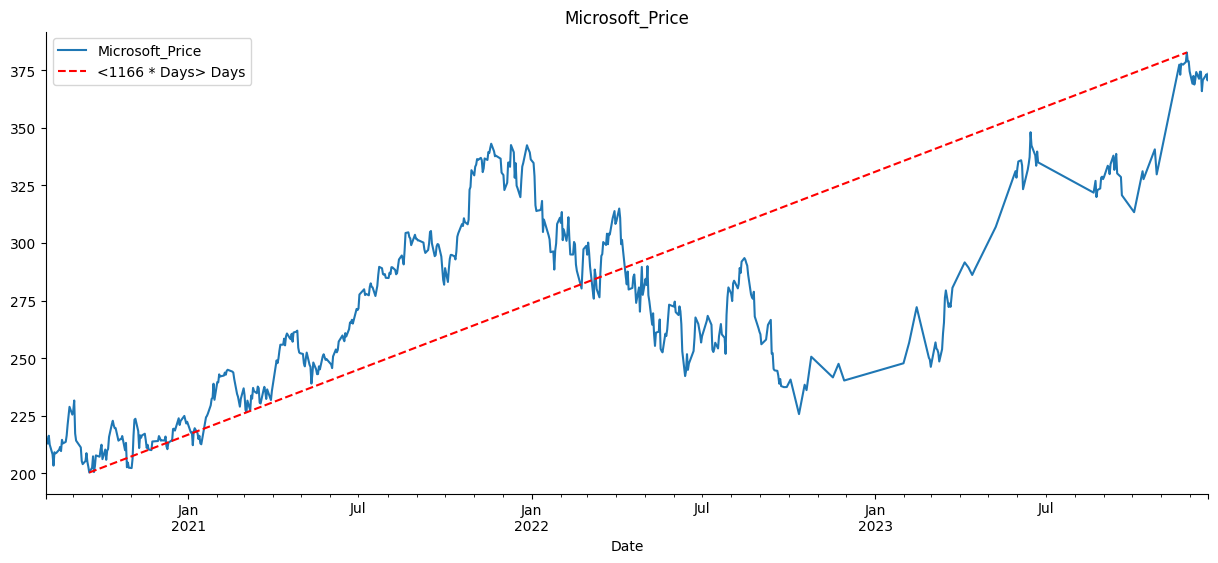

<-577 * Days>


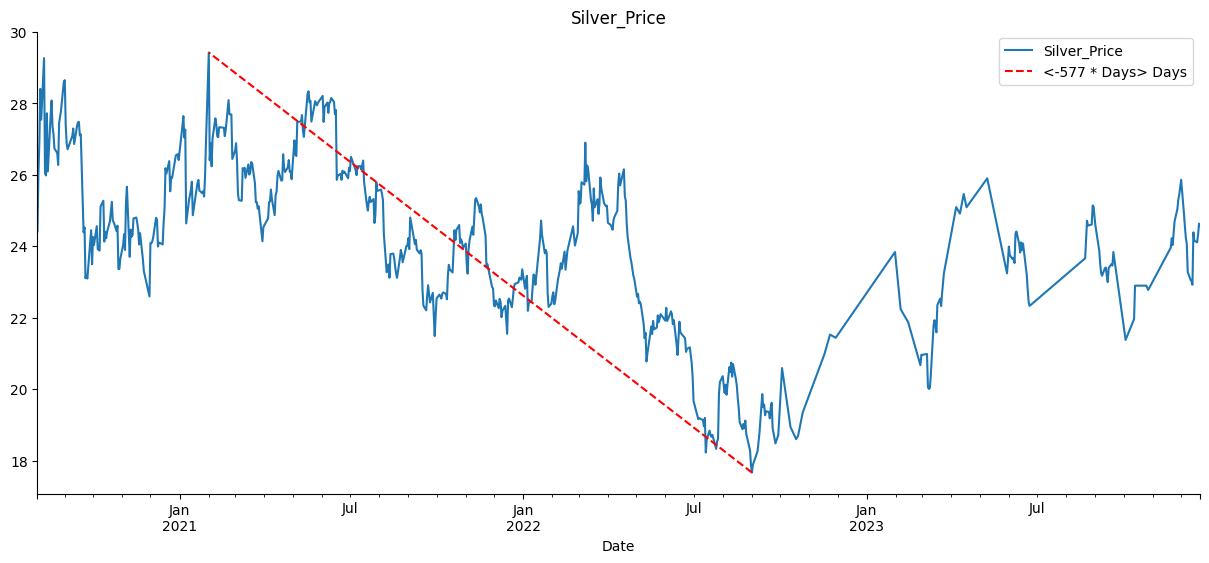

<421 * Days>


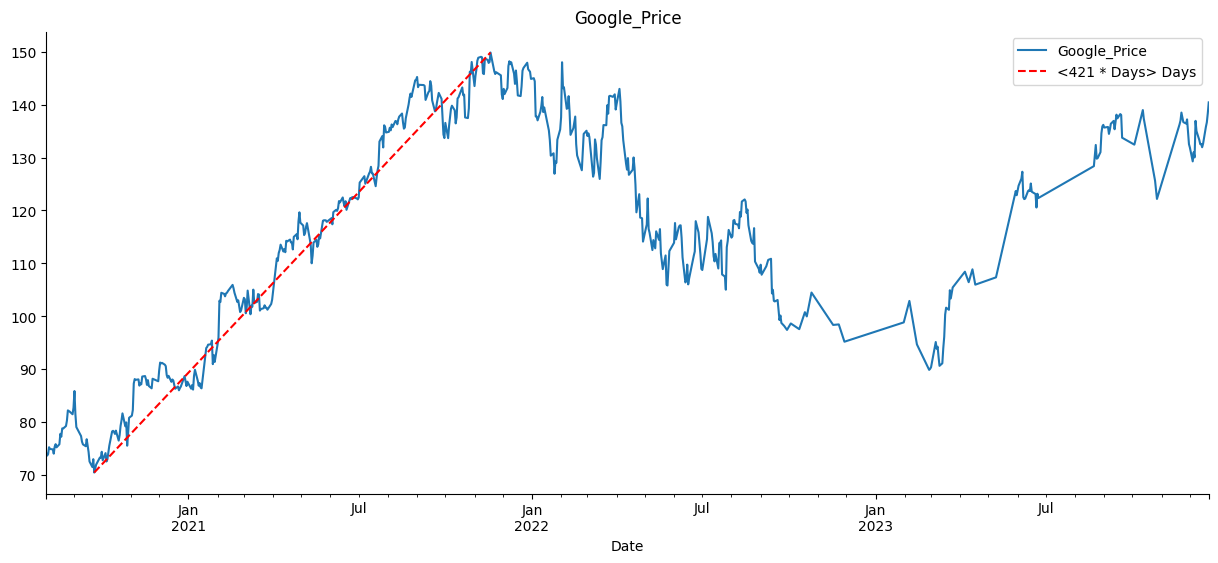

<1196 * Days>


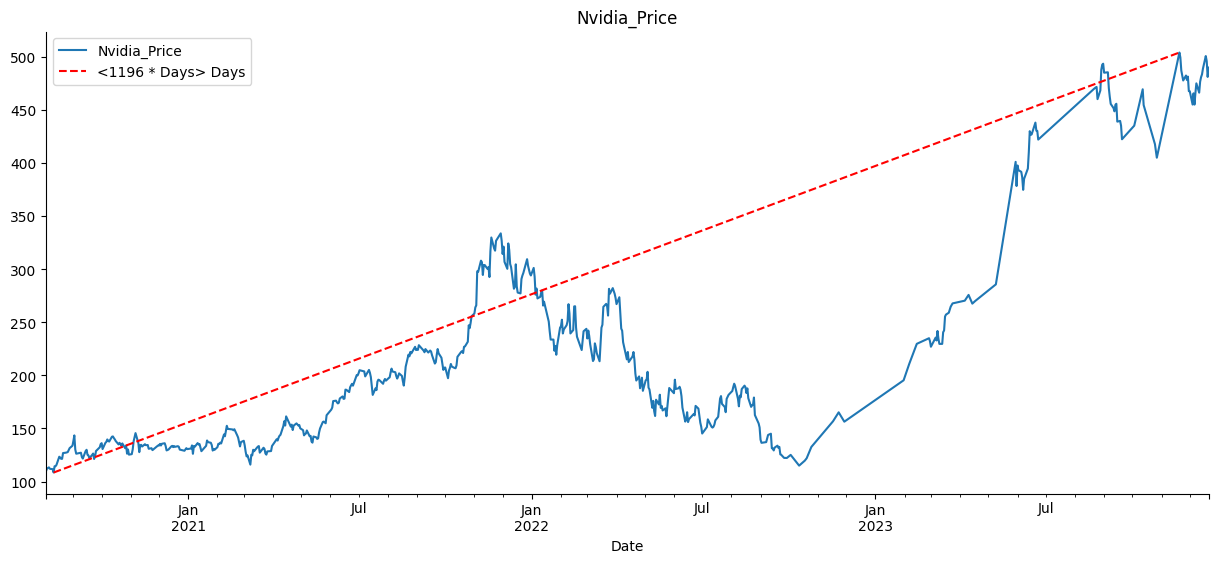

<1142 * Days>


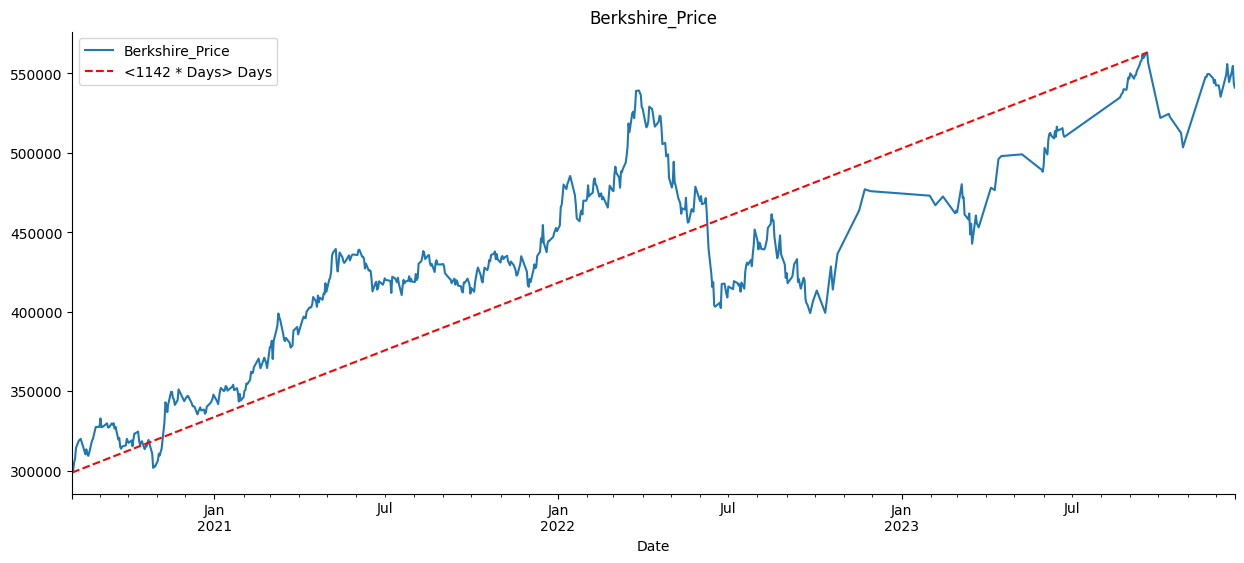

<-175 * Days>


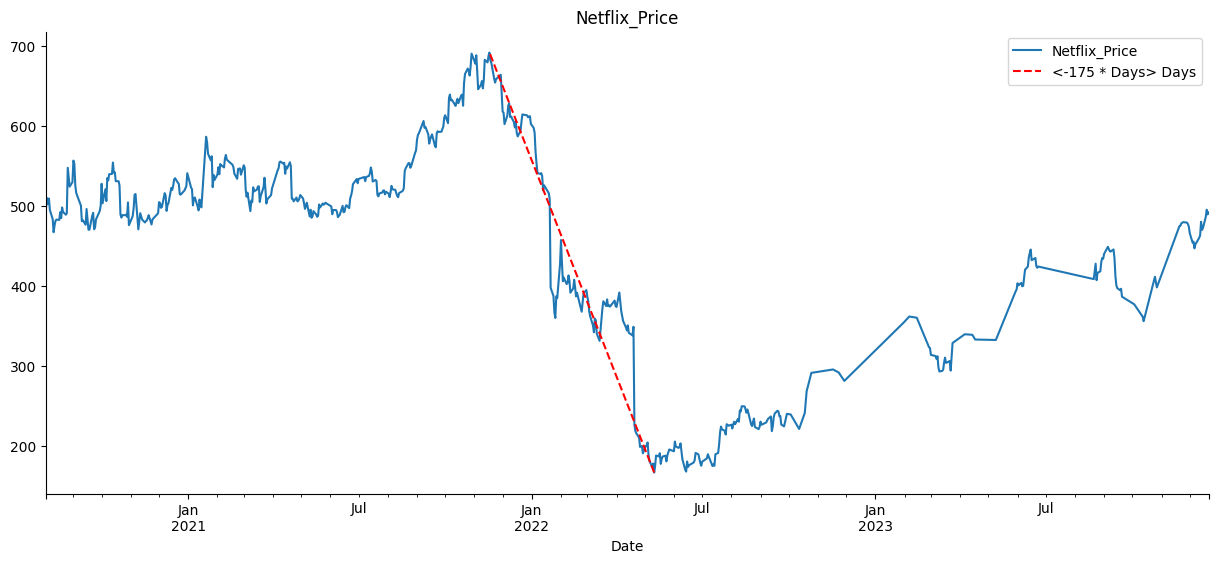

<-610 * Days>


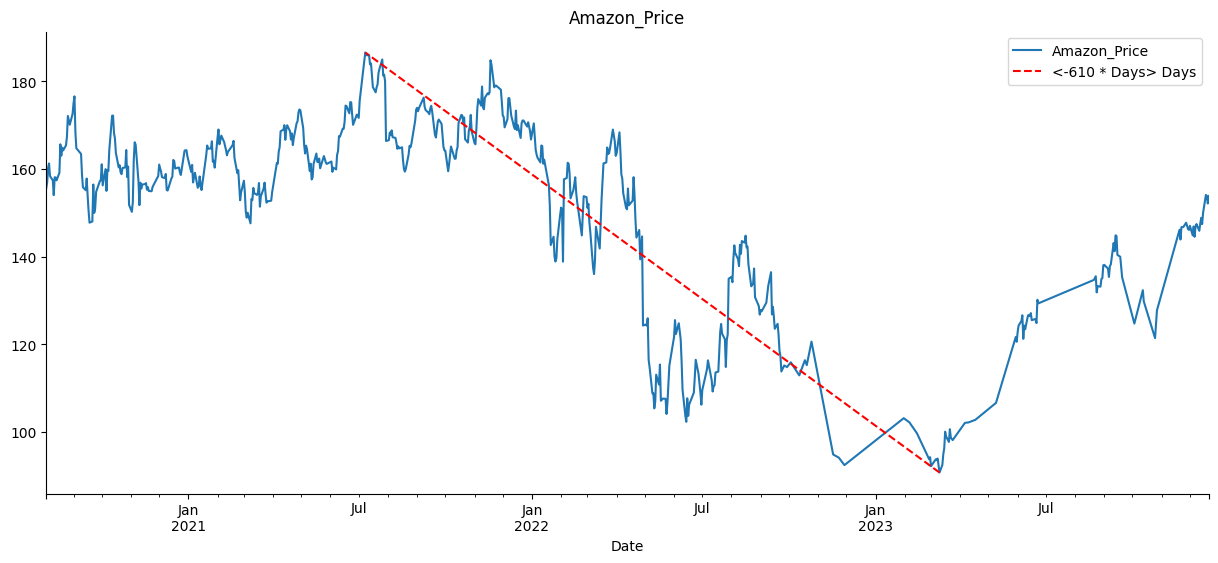

<-454 * Days>


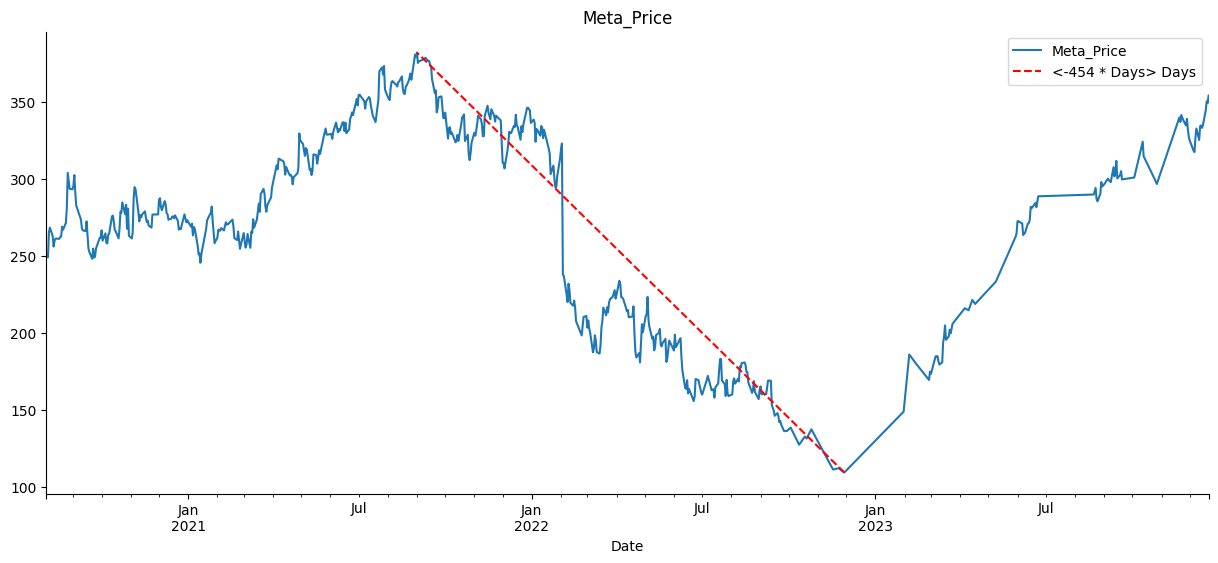

<431 * Days>


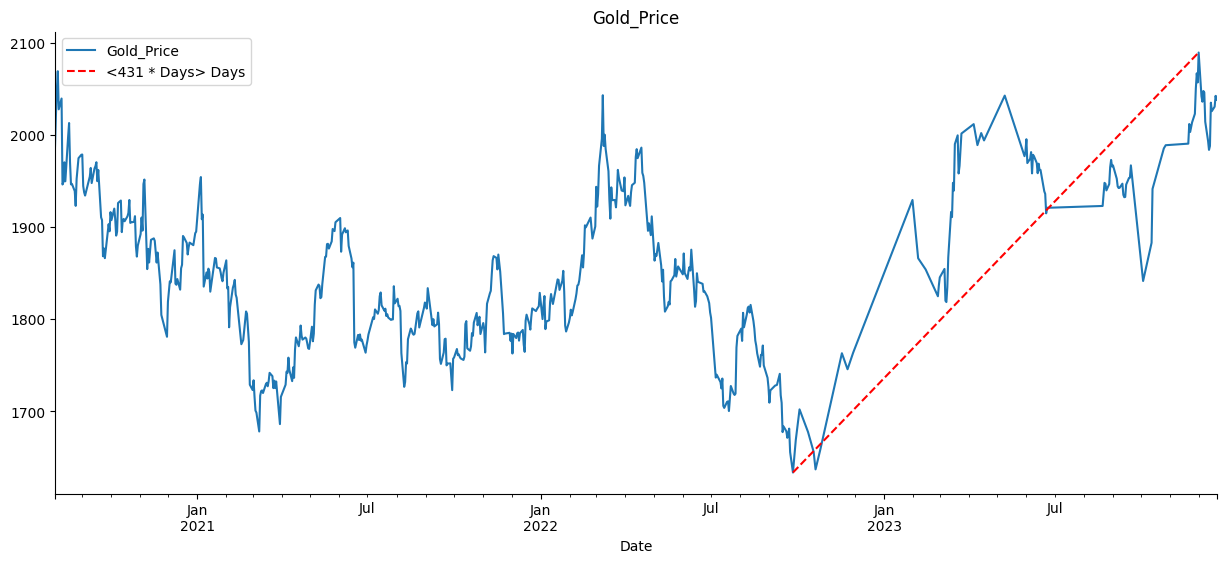

In [213]:
# Plotting checking the days between peak date and trough date

import matplotlib.pyplot as plt
for col in df.columns:
  peak_price = df[col].idxmax()
  trough_price = df[col].idxmin()
  days_between = (peak_price - trough_price)
  print(days_between)

  df[col].plot(kind='line', figsize=(15, 6), title=col)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.plot([trough_price, peak_price], [df[col][trough_price], df[col][peak_price]], linestyle='--', color='red', label=f"{days_between} Days")
  plt.legend()
  plt.show()


In [214]:
def normalize_data(data):
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  return (data - mean) / std

In [215]:
def split_data(data, n_train, n_test):
  train = data[:n_train]
  test = data[n_train:n_train + n_test]
  val = data[n_train + n_test:]
  return train, test, val

In [216]:
df = normalize_data(df)
n_train = int(len(df) * 0.7)
n_test = int(len(df) * 0.2)
train_df, test_df, val_df = split_data(df, n_train, n_test)

# WindowGenerator

In [217]:
class WindowGenerator:
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):

    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.example = next(iter(self.make_dataset(self.train_df)))

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indexes: {self.input_indices}',
        f'Label Indexes: {self.label_indices}',
        f'Column name: {self.label_columns}'])

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='Apple_Price', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

In [218]:
OUT_STEPS = 30
val_performance = {}
performance = {}

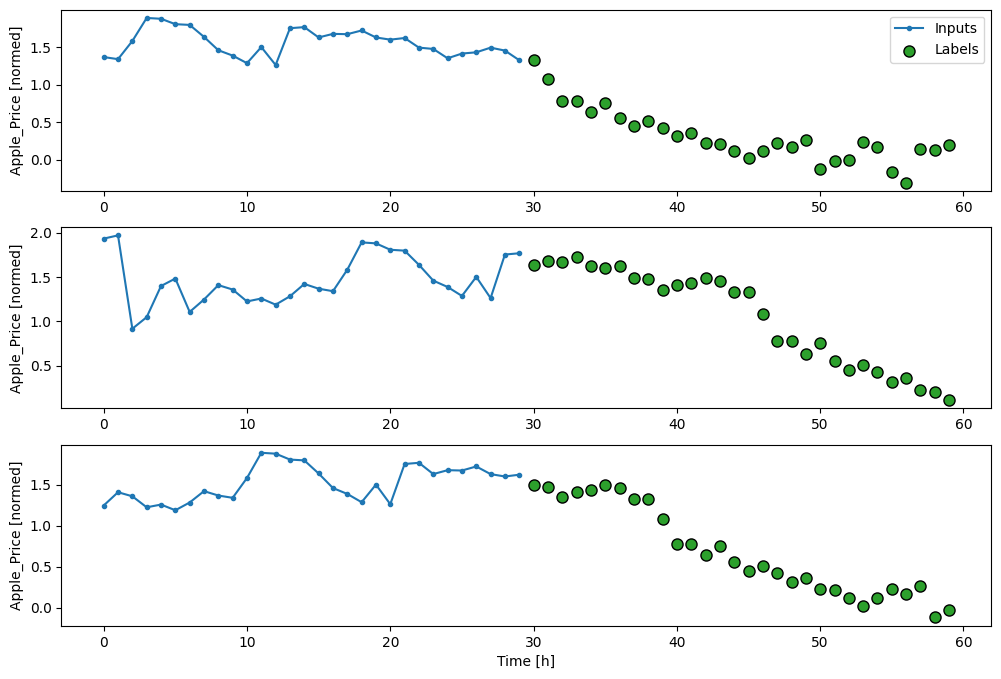

In [219]:
column = 'Apple_Price'
window_apple = WindowGenerator(
    input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=[column])
window_apple.plot()

In [220]:
example_window = tf.stack([
    np.array(train_df[:window_apple.total_window_size]),
    np.array(train_df[100:100 + window_apple.total_window_size]),
    np.array(train_df[200:200 + window_apple.total_window_size])
])

example_inputs, example_labels = window_apple.split_window(example_window)
print('All shapes are: (batch, time, features)')
print(f'window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
window shape: (3, 60, 19)
Inputs shape: (3, 30, 19)
labels shape: (3, 30, 1)


In [221]:
window_apple.example = example_inputs, example_labels

In [222]:
@property
def train(self):
  return self.make_dataset(self.val_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  result = getattr(self, '_example', None)
  if result is None:
    result = next(iter(self.train))
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Create Model and Prediction

In [200]:
def compile_and_fit(model, window, EPOCHS=50, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_los',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(
      window.train,
      epochs=EPOCHS,
      validation_data=window.val,
      callbacks=[early_stopping],
      verbose=0
  )

  return history

In [201]:
def create_model(multi_window=window_apple, num_units=32):
  num_features = multi_window.train.element_spec[0].shape[2]
  model = tf.keras.Sequential([
      tf.keras.layers.LSTM(
          num_units,
          return_sequences=False
      ),
      tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
      tf.keras.layers.Reshape([OUT_STEPS, num_features])
  ])
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_los` which is not available. Available metrics are: loss,mean_absolute_error,val_loss,val_mean_absolute_error
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0295 - mean_absolute_error: 0.1430


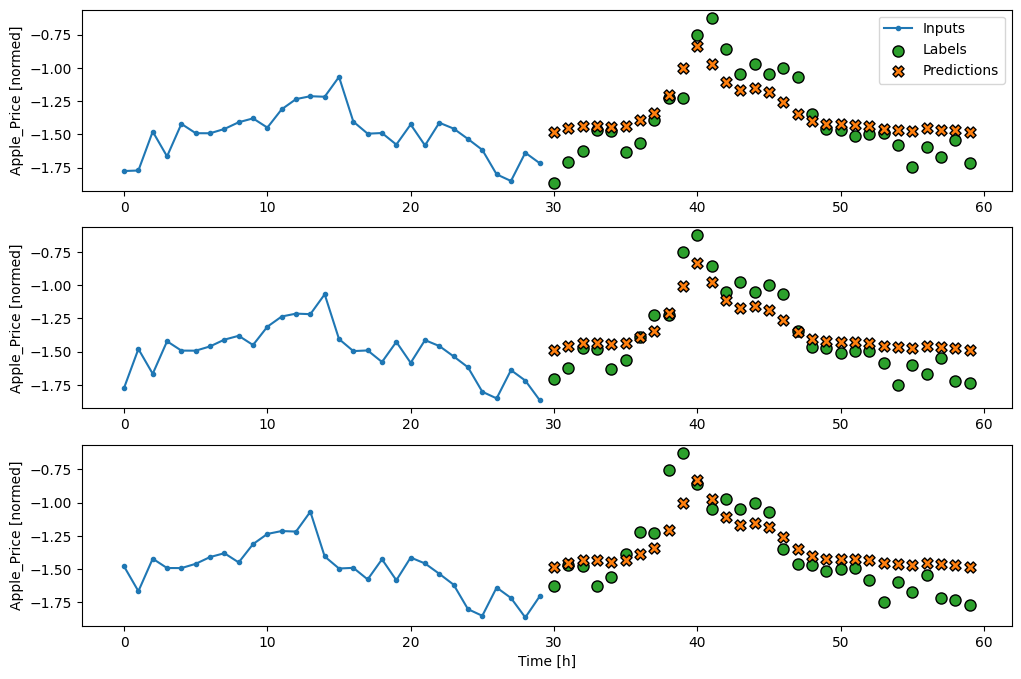

In [202]:
model = create_model()
history = compile_and_fit(
    model, window_apple)

val_performance['LSTM'] = model.evaluate(window_apple.val)
performance['LSTM'] = model.evaluate(window_apple.test, verbose=0)
window_apple.plot(model)